Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownPropertyKeyWarning} {category: UNRECOGNIZED} {title: The provided property key is not in the database} {description: One of the property names in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing property name is: :TYPE)} {position: line: 3, column: 31, offset: 79} for query: "\nMATCH (n {node_id: 'FOODON_00002114'})-[r]->(m)\nRETURN n.node_id AS Source, r.`:TYPE` AS Relationship, m.node_id AS Target\n"


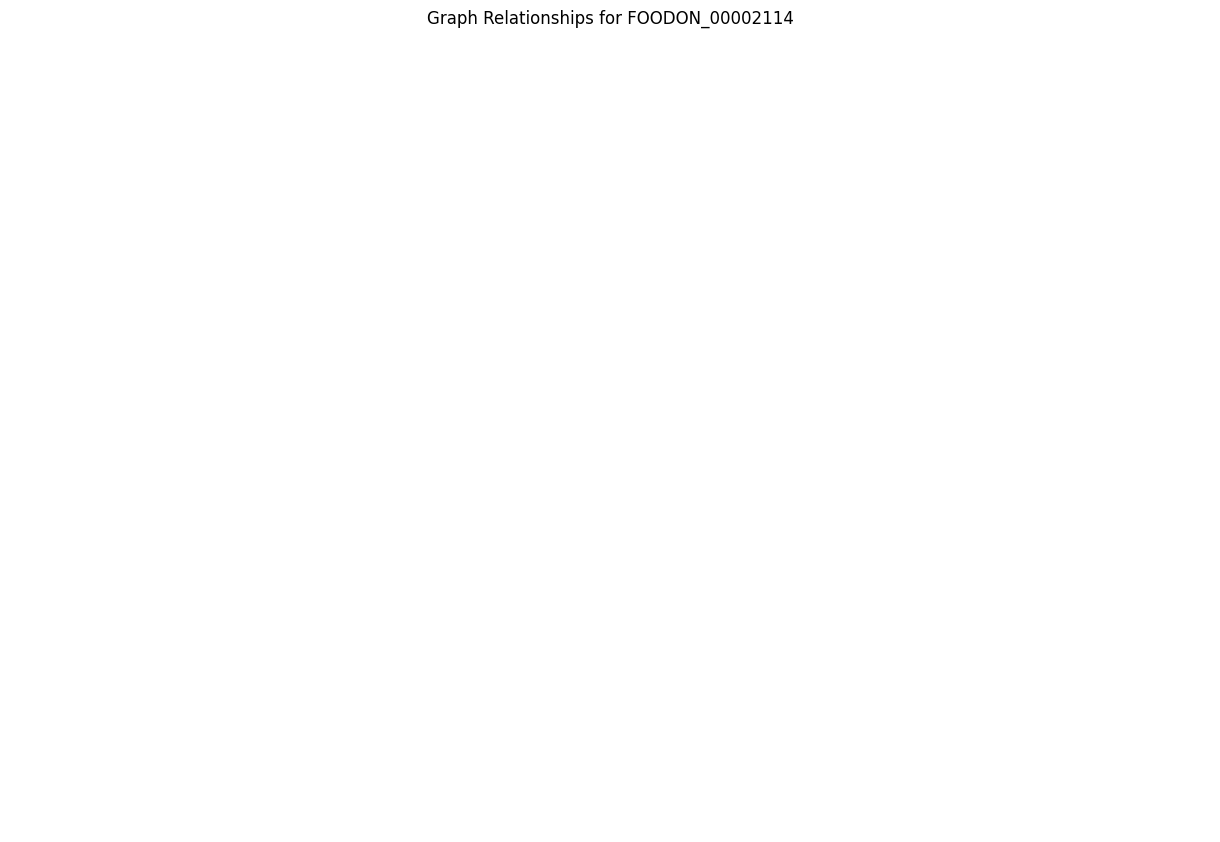

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

uri = "bolt://67.58.49.57:7687"
username = "neo4j"
password = "t6pniz4w"

driver = GraphDatabase.driver(uri, auth=(username, password))

def run_cypher_query(query):
    with driver.session() as session:
        result = session.run(query)
        return [record for record in result]

query = """
MATCH (n {node_id: 'FOODON_00002114'})-[r]->(m)
RETURN n.node_id AS Source, r.`:TYPE` AS Relationship, m.node_id AS Target
"""

results = run_cypher_query(query)

G = nx.DiGraph()

for record in results:
    source = record["Source"]
    target = record["Target"]
    relationship = record["Relationship"]
    G.add_node(source, label=source)
    G.add_node(target, label=target)
    G.add_edge(source, target, label=relationship)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
plt.title("Graph Relationships for FOODON_00002114")
plt.show()

# Close the driver connection
driver.close()

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

# Neo4j connection
uri = "bolt://67.58.49.57:7687"
username = "neo4j"
password = "t6pniz4w"

driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to run a Cypher query
def run_cypher_query(query):
    with driver.session() as session:
        result = session.run(query)
        return [record for record in result]

# Define new queries
new_queries = {
    "Food Additives and Their Types": """
        MATCH (additive)-[r]->(type)
        WHERE additive.name CONTAINS "food additive" AND r.type = "is_a"
        RETURN additive.name AS Additive, type.name AS Type, r.type AS Relationship
    """,
    "Specific Food Preparation Processes": """
        MATCH (food {name: "potato food product"})-[r]->(process)
        WHERE r.type CONTAINS "process"
        RETURN food.name AS Food, process.name AS Process, r.type AS Relationship
    """,
    "Plant-Based Food Products": """
        MATCH (plantFood)-[r]->(subCategory)
        WHERE plantFood.name CONTAINS "plant food product" AND r.type = "is_a"
        RETURN plantFood.name AS PlantFood, subCategory.name AS SubCategory, r.type AS Relationship
    """
}

# Execute queries and display results
for description, query in new_queries.items():
    print(f"Executing Query: {description}")
    results = run_cypher_query(query)
    for record in results:
        print(record)

driver.close()


Executing Query: Food Additives and Their Types
<Record Additive='food additive' Type='chemical food component' Relationship='is_a'>
<Record Additive='food additive (us cfr)' Type='U.S. code of federal regulations, title 21 food product type' Relationship='is_a'>
<Record Additive='food additive regulatory classification' Type='agency food product type' Relationship='is_a'>
<Record Additive='food additive classification, european community' Type='food additive regulatory classification' Relationship='is_a'>
<Record Additive='acid (food additive, EC)' Type='food additive classification, european community' Relationship='is_a'>
<Record Additive='Codex Alimentarius food additive functional class' Type='food additive regulatory classification' Relationship='is_a'>
<Record Additive='Codex Alimentarius food classification for food additives' Type='international agency food product type' Relationship='is_a'>
<Record Additive='CIAA food classification for food additives' Type='European Union ag

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

# Neo4j connection
uri = "bolt://67.58.49.57:7687"
username = "neo4j"
password = "t6pniz4w"

driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to run a Cypher query
def run_cypher_query(query):
    with driver.session() as session:
        result = session.run(query)
        return [record for record in result]

# Define new queries
new_queries = {
    "Regulatory Classifications of Food Additives": """
        MATCH (additive)-[r]->(regulation)
        WHERE additive.name CONTAINS "food additive"
          AND r.type = "is_a"
          AND regulation.name CONTAINS "regulatory classification"
        RETURN additive.name AS Additive, regulation.name AS Regulation, r.type AS Relationship
    """,
    "Food Products and Their Ingredients": """
        MATCH (food)-[r:has_ingredient]->(ingredient)
        RETURN food.name AS FoodProduct, ingredient.name AS Ingredient, type(r) AS Relationship
    """,
    "Foods Containing Specific Nutrients": """
        MATCH (food)-[r:contains_nutrient]->(nutrient {name: "Vitamin C"})
        RETURN food.name AS FoodProduct, nutrient.name AS Nutrient, r.amount AS Amount
    """,
    "Allergenic Foods": """
        MATCH (food)-[r:is_allergen]->(allergenInfo)
        RETURN food.name AS FoodProduct, allergenInfo.name AS AllergenInfo, type(r) AS Relationship
    """,
    "Food Preparation Methods": """
        MATCH (food)-[r:prepared_by]->(method)
        RETURN food.name AS FoodProduct, method.name AS PreparationMethod, type(r) AS Relationship
    """,
    "Cultural Cuisine Categories": """
        MATCH (food)-[r:belongs_to_cuisine]->(cuisine)
        RETURN food.name AS FoodProduct, cuisine.name AS Cuisine, type(r) AS Relationship
    """
}

# Execute queries and display results
for description, query in new_queries.items():
    print(f"\nExecuting Query: {description}")
    results = run_cypher_query(query)
    if results:
        for record in results:
            print(record)
    else:
        print("No results found for this query.")

# Close the connection
driver.close()



Executing Query: Regulatory Classifications of Food Additives


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: has_ingredient)} {position: line: 2, column: 25, offset: 25} for query: '\n        MATCH (food)-[r:has_ingredient]->(ingredient)\n        RETURN food.name AS FoodProduct, ingredient.name AS Ingredient, type(r) AS Relationship\n    '
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the data

<Record Additive='food additive classification, european community' Regulation='food additive regulatory classification' Relationship='is_a'>
<Record Additive='Codex Alimentarius food additive functional class' Regulation='food additive regulatory classification' Relationship='is_a'>

Executing Query: Food Products and Their Ingredients
No results found for this query.

Executing Query: Foods Containing Specific Nutrients
No results found for this query.

Executing Query: Allergenic Foods
No results found for this query.

Executing Query: Food Preparation Methods
No results found for this query.

Executing Query: Cultural Cuisine Categories


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.UnknownRelationshipTypeWarning} {category: UNRECOGNIZED} {title: The provided relationship type is not in the database.} {description: One of the relationship types in your query is not available in the database, make sure you didn't misspell it or that the label is available when you run this statement in your application (the missing relationship type is: belongs_to_cuisine)} {position: line: 2, column: 25, offset: 25} for query: '\n        MATCH (food)-[r:belongs_to_cuisine]->(cuisine)\n        RETURN food.name AS FoodProduct, cuisine.name AS Cuisine, type(r) AS Relationship\n    '


No results found for this query.


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase


# Function to run a Cypher query
def run_cypher_query(query):
    with driver.session() as session:
        result = session.run(query)
        return [record for record in result]

new_queries = {
   
    "Food Additives and Their Regulatory Classifications": """
        MATCH (additive:Node)-[r:RELATES_TO {type:'is_a'}]->(regulation:Node)
        WHERE additive.name CONTAINS 'food additive' AND regulation.name CONTAINS 'regulatory classification'
        RETURN additive.name AS Additive, regulation.name AS Regulation
    """,
    "Food Additives and Their Parents": """
        MATCH (additive:Node)-[r:RELATES_TO {type:'is_a'}]->(parent:Node)
        WHERE additive.name CONTAINS 'food additive'
        RETURN additive.name AS Additive, parent.name AS Parent
    """,
    "Hierarchy of 'food additive' Nodes": """
        MATCH (child:Node)-[r:RELATES_TO {type:'is_a'}]->(parent:Node)
        WHERE child.name CONTAINS 'food additive' OR parent.name CONTAINS 'food additive'
        RETURN child.name AS Child, parent.name AS Parent
    """,
    "All Relationships Involving 'food additive'": """
        MATCH (n:Node)-[r:RELATES_TO]->(m:Node)
        WHERE n.name CONTAINS 'food additive' OR m.name CONTAINS 'food additive'
        RETURN n.name AS Node1, r.type AS RelationshipType, m.name AS Node2
    """,
    "Find Nodes Containing 'food'": """
        MATCH (n:Node)
        WHERE n.name CONTAINS 'food'
        RETURN n.name AS NodeName
        LIMIT 50
    """,
    "Find 'food' Nodes and Their Parents": """
        MATCH (n:Node)-[r:RELATES_TO {type:'is_a'}]->(parent:Node)
        WHERE n.name CONTAINS 'food'
        RETURN n.name AS Child, parent.name AS Parent
    """,
    "All 'equivalent_to' Relationships": """
        MATCH (n1:Node)-[r:RELATES_TO {type:'equivalent_to'}]->(n2:Node)
        RETURN n1.name AS Node1, n2.name AS Node2
        LIMIT 50
    """,
    "Relationships with 'obo.' Type": """
        MATCH (n:Node)-[r:RELATES_TO]->(m:Node)
        WHERE r.type STARTS WITH 'obo.'
        RETURN n.name AS Node1, r.type AS RelationshipType, m.name AS Node2
        LIMIT 50
    """
}

for description, query in new_queries.items():
    print(f"\nExecuting Query: {description}")
    results = run_cypher_query(query)
    if results:
        for record in results:
            print(record)
    else:
        print("No results found for this query.")

driver.close()



Executing Query: Food Additives and Their Regulatory Classifications


/tmp/ipykernel_1486/2509964897.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


<Record Additive='food additive classification, european community' Regulation='food additive regulatory classification'>
<Record Additive='Codex Alimentarius food additive functional class' Regulation='food additive regulatory classification'>

Executing Query: Food Additives and Their Parents
<Record Additive='food additive' Parent='chemical food component'>
<Record Additive='food additive (us cfr)' Parent='U.S. code of federal regulations, title 21 food product type'>
<Record Additive='food additive regulatory classification' Parent='agency food product type'>
<Record Additive='food additive classification, european community' Parent='food additive regulatory classification'>
<Record Additive='acid (food additive, EC)' Parent='food additive classification, european community'>
<Record Additive='Codex Alimentarius food additive functional class' Parent='food additive regulatory classification'>
<Record Additive='Codex Alimentarius food classification for food additives' Parent='inter

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

# Function to run a Cypher query
def run_cypher_query(query):
    with driver.session() as session:
        result = session.run(query)
        return [record for record in result]

specific_queries = {

    "Additives Containing 'Sulfate' or 'Sulphate'": """
        MATCH (additive:Node)-[:RELATES_TO {type: 'is_a'}]->(parent:Node)
        WHERE additive.name CONTAINS 'sulfate' OR additive.name CONTAINS 'sulphate'
        RETURN additive.name AS Additive, parent.name AS Parent
    """,
        "Descendants of a Specific Food Category": """
        MATCH (parent:Node {name: '38470 - dishes excluding pasta or rice dishes, sandwiches and pizza (efsa foodex2)'})
              -[:RELATES_TO* {type:'is_a'}]->(descendant:Node)
        RETURN descendant.name AS Descendant
    """
}

for description, query in specific_queries.items():
    print(f"\nExecuting Query: {description}")
    results = run_cypher_query(query)
    if results:
        for record in results:
            print(record)
    else:
        print("No results found for this query.")

driver.close()



Executing Query: Additives Containing 'Sulfate' or 'Sulphate'


/tmp/ipykernel_894/1814443478.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


<Record Additive='calcium sulfate' Parent='food additive'>
<Record Additive='calcium sulfate' Parent='calcium salt'>
<Record Additive='calcium sulfate' Parent='inorganic sulfate salt'>
<Record Additive='calcium sulfate' Parent=''>
<Record Additive='inorganic sulfate salt' Parent='sulfate salt'>
<Record Additive='inorganic sulfate salt' Parent='inorganic salt'>
<Record Additive='inorganic sulfate salt' Parent=''>
<Record Additive='potassium sulfate' Parent='food additive'>
<Record Additive='potassium sulfate' Parent='inorganic sulfate salt'>
<Record Additive='potassium sulfate' Parent='inorganic potassium salt'>
<Record Additive='sulfate salt' Parent='sulfates'>
<Record Additive='sulfate salt' Parent=''>
<Record Additive='sulfates' Parent='sulfuric acid derivative'>
<Record Additive='polysaccharide sulfate' Parent='polysaccharide derivative'>
<Record Additive='polysaccharide sulfate' Parent='carbohydrate sulfate'>
<Record Additive='carbohydrate sulfate' Parent='carbohydrate derivative'>

In [48]:
nodes_df = pd.read_csv("merged_rel.csv")
print("Columns in merged_nodes.csv:", nodes_df.columns)


Columns in merged_nodes.csv: Index([':START_ID', ':END_ID', ':TYPE', 'restriction', 'restriction_value',
       'label'],
      dtype='object')


In [14]:
# combined_schema

In [50]:
!pip install openai==0.28

  Attempting uninstall: openai
    Found existing installation: openai 1.57.0
    Uninstalling openai-1.57.0:
      Successfully uninstalled openai-1.57.0
